<a href="https://colab.research.google.com/github/abhi1628/Emotion_Detection/blob/main/Emotion_Detection_1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt
%matplotlib inline

import keras
from keras.models import load_model
from PIL import Image
from keras.preprocessing import image
from tensorflow.keras.utils import load_img, img_to_array
from keras.models import Sequential, Model, model_from_json
from keras.layers import Dense, Conv2D, Activation, MaxPool2D, Flatten, Dropout, BatchNormalization
from keras.utils import to_categorical  # Change here
from keras.preprocessing import image
from keras.callbacks import ModelCheckpoint
from keras.utils import to_categorical
from keras.models import load_model
from PIL import Image
from keras.preprocessing import image

In [3]:
data = pd.read_csv("/content/drive/MyDrive/emotional_dataset.csv")
data.shape

(35887, 3)

In [4]:
data.head()

,emotion,pixels,Usage
0,0,70 80 82 72 58 58 60 63 54 58 60 48 89 115 121...,Training
1,0,151 150 147 155 148 133 111 140 170 174 182 15...,Training
2,2,231 212 156 164 174 138 161 173 182 200 106 38...,Training
3,4,24 32 36 30 32 23 19 20 30 41 21 22 32 34 21 1...,Training
4,6,4 0 0 0 0 0 0 0 0 0 0 0 3 15 23 28 48 50 58 84...,Training


In [5]:
data["Usage"].value_counts()

Training       28709
PublicTest      3589
PrivateTest     3589
Name: Usage, dtype: int64

In [6]:
# Convert "Usage" column to strings
data["Usage"] = data["Usage"].astype(str)

# Get unique values
unique_values = np.unique(data["Usage"].values.ravel())

In [7]:
# We just put the training samples into the train_data variable
train_data = data [data.Usage == "Training"]

In [8]:
# Assuming you have already split the pixel values
train_pixels = train_data.pixels.str.split(" ").tolist()

# Creating DataFrame without specifying dtype
train_pixels = pd.DataFrame(train_pixels)

# Converting to numpy array
train_images = train_pixels.values

# If you need to convert to float explicitly
train_images = train_images.astype(np.float64)

In [9]:
print(train_images)

[[ 70.  80.  82. ... 106. 109.  82.]
 [151. 150. 147. ... 193. 183. 184.]
 [231. 212. 156. ...  88. 110. 152.]
 ...
 [ 74.  81.  87. ... 188. 187. 187.]
 [222. 227. 203. ... 136. 136. 134.]
 [195. 199. 205. ...   6.  15.  38.]]


In [10]:
print(train_images.shape)

(28709, 2304)


In [11]:
# Let's define a function to display the image as 48x48 pixels
def show(img):
    show_image = img.reshape(48,48)

    plt.axis('off')
    plt.imshow(show_image, cmap='gray')

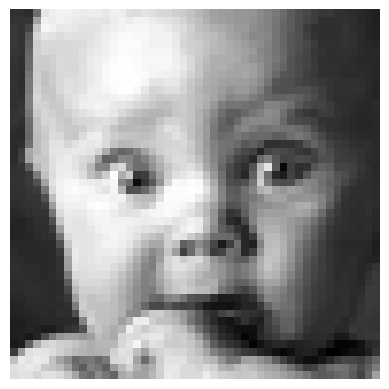

In [12]:
# An example image from the training set
show(train_images[750])

In [13]:
# Let's see how many classes are in the training set

train_labels_flat = train_data["emotion"].values.ravel()
train_labels_count = np.unique(train_labels_flat).shape[0]
print('Number of different facial expressions: %d'%train_labels_count)

Number of different facial expressions: 7


In [14]:
# Let's see the class of each data in the training set, that is,
# the size of the training process, with One Hot.

def dense_to_one_hot(labels_dense, num_classes):
    num_labels = labels_dense.shape[0]
    index_offset = np.arange(num_labels) * num_classes
    labels_one_hot = np.zeros((num_labels, num_classes))
    labels_one_hot.flat[index_offset + labels_dense.ravel()] = 1
    return labels_one_hot

In [15]:
y_train = dense_to_one_hot(train_labels_flat, train_labels_count)
y_train = y_train.astype(np.uint8)
print(y_train.shape)

(28709, 7)


In [16]:
np.unique(data["Usage"].values.ravel())
print('Number of samples in the test dataset: %d'%(len(data[data.Usage == "PublicTest"])))

Number of samples in the test dataset: 3589


In [17]:
test_data = data[data.Usage == "PublicTest"]

# Assuming you have already split the pixel values
test_pixels = test_data.pixels.str.split(" ").tolist()

# Creating DataFrame without specifying dtype
test_pixels = pd.DataFrame(test_pixels)

# Converting to numpy array
test_images = test_pixels.values

# If you need to convert to float explicitly
test_images = test_images.astype(np.float64)

print(test_images.shape)

(3589, 2304)


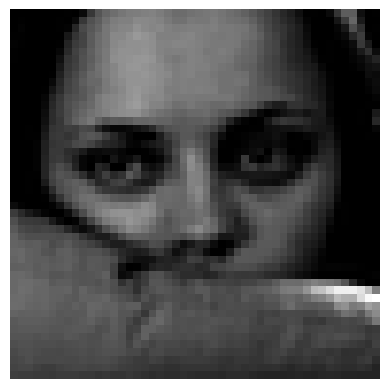

In [18]:
# An example image from the training set
show(test_images[150])

In [19]:
# Let's see the class of each data in the test set, that is,
# the size of the training process, with One Hot.

test_labels_flat = test_data["emotion"].values.ravel()
test_labels_count = np.unique(test_labels_flat).shape[0]

y_test = dense_to_one_hot(test_labels_flat, test_labels_count)

y_test = y_test.astype(np.uint8)

print(y_test.shape)

(3589, 7)


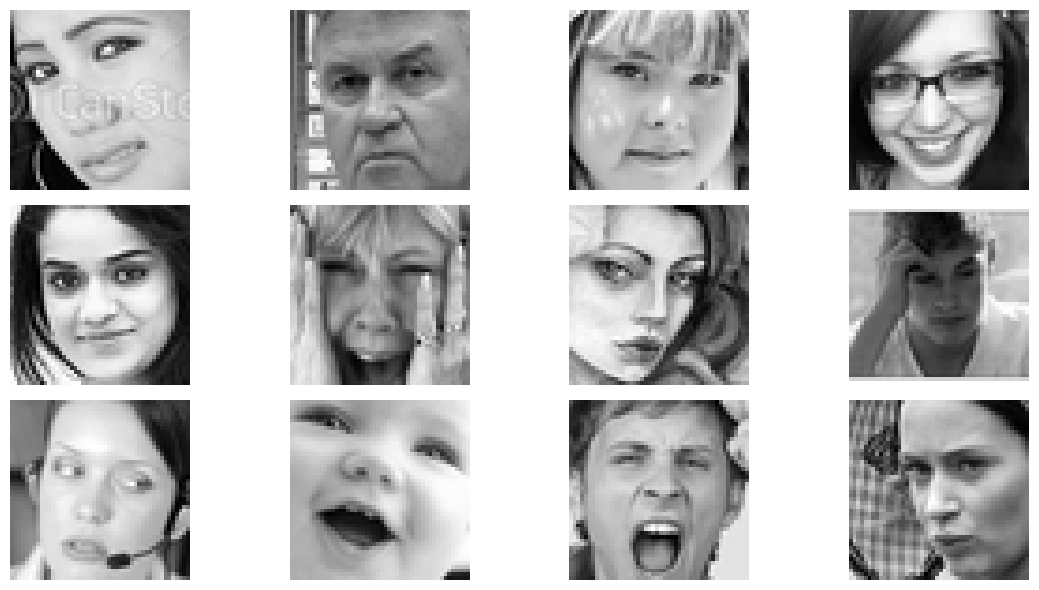

In [20]:
plt.figure(0, figsize=(12,6))
for i in range(1,13):
  plt.subplot(3, 4, i)
  plt.axis('off')

  image = test_images[i].reshape(48,48)
  plt.imshow(image, cmap='gray')

plt.tight_layout()
plt.show()

In [21]:
# DEFINING A DEEP CONVOLUTIONARY NEURAL NETWORK MODEL

model = Sequential()

#1. LAYER
model.add(Conv2D(64, 3, data_format="channels_last", kernel_initializer="he_normal", input_shape=(48,48,1)))
model.add(BatchNormalization())
model.add(Activation('relu'))

#2. LAYER

model.add(Conv2D(64, 3))
model.add(BatchNormalization())
model.add(Activation('relu'))
model.add(MaxPool2D(pool_size=(2,2), strides=2))
model.add(Dropout(0.6)) #60% forgetting process (neuron deletion-dropout)

### 3. LAYER
model.add(Conv2D(32, 3))
model.add(BatchNormalization())
model.add(Activation('relu'))


### 4. LAYER
model.add(Conv2D(32, 3))
model.add(BatchNormalization())
model.add(Activation('relu'))

### 5. LAYER
model.add(Conv2D(32, 3))
model.add(BatchNormalization())
model.add(Activation('relu'))
model.add(MaxPool2D(pool_size=(2,2), strides=2))
model.add(Dropout(0.6)) #60% forgetting process (neuron deletion-dropout)

### FULL CONNECTION LAYER
model.add(Flatten())
model.add(Dense(128))
model.add(BatchNormalization())
model.add(Activation('relu'))
model.add(Dropout(0.6)) #60% forgetting process (neuron deletion-dropout)

### OUTPUT LAYER

# Classification process (there are 7 emotion classes)
model.add(Dense(7))
model.add(Activation('softmax'))

# Determination of optimization and performance calculation metrics
model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])

model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 46, 46, 64)        640       
                                                                 
 batch_normalization (Batch  (None, 46, 46, 64)        256       
 Normalization)                                                  
                                                                 
 activation (Activation)     (None, 46, 46, 64)        0         
                                                                 
 conv2d_1 (Conv2D)           (None, 44, 44, 64)        36928     
                                                                 
 batch_normalization_1 (Bat  (None, 44, 44, 64)        256       
 chNormalization)                                                
                                                                 
 activation_1 (Activation)   (None, 44, 44, 64)        0

In [22]:
# Let's print the number of elements, height and width,
# and number of channels information of the Training and Test sets on the screen.
x_train = train_images.reshape(-1, 48, 48, 1)
x_test = test_images.reshape(-1, 48, 48, 1)

print('Train:', x_train.shape)
print('Test:', x_test.shape)

Train: (28709, 48, 48, 1)
Test: (3589, 48, 48, 1)


In [23]:
# Number of elements and emotion classes of Training and Test sets.

print('Train:', y_train.shape)
print('Test:', y_test.shape)

Train: (28709, 7)
Test: (3589, 7)


In [26]:
from tensorflow.keras.callbacks import ModelCheckpoint
from tensorflow.keras.preprocessing.image import ImageDataGenerator

# Reduce batch size
batch_size = 32

# Use data generator
datagen = ImageDataGenerator()  # You can customize this based on your data augmentation needs
train_generator = datagen.flow(x_train, y_train, batch_size=batch_size)

# Run the model
checkpointer = ModelCheckpoint(filepath='/content/face_model.h5', verbose=1, save_best_only=True)

epochs = 10

hist = model.fit(train_generator,
                 steps_per_epoch=len(x_train) // batch_size,  # Adjust this based on your dataset size
                 epochs=epochs,
                 shuffle=True,
                 validation_data=(x_test, y_test),
                 callbacks=[checkpointer], verbose=2)

# Save model to json
model_json = model.to_json()
with open('/content/face_model.json', 'w') as json_file:
    json_file.write(model_json)

# Free up memory
del x_train, y_train, x_test, y_test

# Explicitly clear session and garbage collection
import tensorflow as tf
tf.keras.backend.clear_session()
import gc
gc.collect()


Epoch 1/10

Epoch 1: val_loss improved from inf to 1.42238, saving model to /content/face_model.h5


/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py:3103: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


897/897 - 628s - loss: 1.5903 - accuracy: 0.3782 - val_loss: 1.4224 - val_accuracy: 0.4358 - 628s/epoch - 700ms/step
Epoch 2/10

Epoch 2: val_loss improved from 1.42238 to 1.40522, saving model to /content/face_model.h5
897/897 - 615s - loss: 1.4575 - accuracy: 0.4368 - val_loss: 1.4052 - val_accuracy: 0.4514 - 615s/epoch - 685ms/step
Epoch 3/10

Epoch 3: val_loss improved from 1.40522 to 1.28449, saving model to /content/face_model.h5
897/897 - 603s - loss: 1.3829 - accuracy: 0.4689 - val_loss: 1.2845 - val_accuracy: 0.5001 - 603s/epoch - 672ms/step
Epoch 4/10

Epoch 4: val_loss improved from 1.28449 to 1.24477, saving model to /content/face_model.h5
897/897 - 611s - loss: 1.3367 - accuracy: 0.4892 - val_loss: 1.2448 - val_accuracy: 0.5166 - 611s/epoch - 681ms/step
Epoch 5/10

Epoch 5: val_loss did not improve from 1.24477
897/897 - 614s - loss: 1.3100 - accuracy: 0.5011 - val_loss: 1.2723 - val_accuracy: 0.4982 - 614s/epoch - 684ms/step
Epoch 6/10

Epoch 6: val_loss improved from 1.2

1676

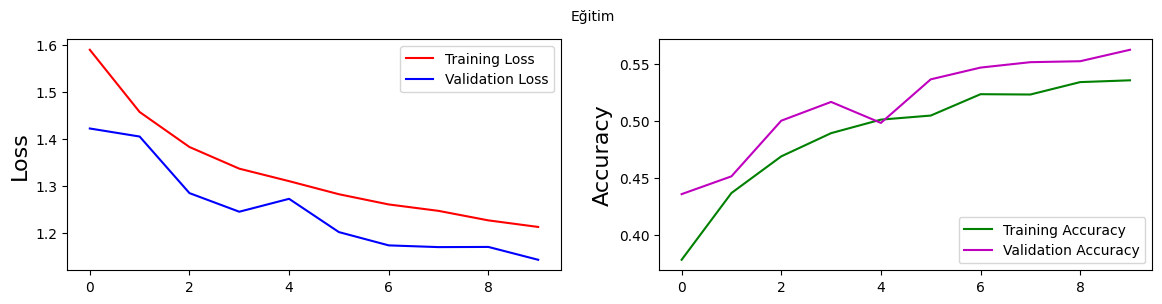

In [27]:
# Process of expressing the Training and Validation results obtained
# as a result of the training graphically and printing them on the screen

plt.figure(figsize=(14,3))
plt.subplot(1, 2, 1)
plt.suptitle('Eğitim', fontsize=10)
plt.ylabel('Loss', fontsize=16)
plt.plot(hist.history['loss'], color ='r', label='Training Loss')
plt.plot(hist.history['val_loss'], color ='b', label='Validation Loss')
plt.legend(loc='upper right')


plt.subplot(1, 2, 2)
plt.ylabel('Accuracy', fontsize=16)
plt.plot(hist.history['accuracy'], color ='g', label='Training Accuracy')
plt.plot(hist.history['val_accuracy'], color ='m', label='Validation Accuracy')
plt.legend(loc='lower right')

plt.show()

In [28]:
test = data[["emotion", "pixels"]][data["Usage"] == "PrivateTest"]
test["pixels"] = test["pixels"].apply(lambda im: np.fromstring(im, sep=' '))

test.head()

,emotion,pixels
32298,0,"[170.0, 118.0, 101.0, 88.0, 88.0, 75.0, 78.0, ..."
32299,5,"[7.0, 5.0, 8.0, 6.0, 7.0, 3.0, 2.0, 6.0, 5.0, ..."
32300,6,"[232.0, 240.0, 241.0, 239.0, 237.0, 235.0, 246..."
32301,4,"[200.0, 197.0, 149.0, 139.0, 156.0, 89.0, 111...."
32302,2,"[40.0, 28.0, 33.0, 56.0, 45.0, 33.0, 31.0, 78...."


In [29]:
x_test_private = np.vstack(test["pixels"].values)
y_test_private = np.array(test["emotion"])
x_test_private = x_test_private.reshape(-1, 48, 48, 1)
y_test_private = to_categorical(y_test_private)
x_test_private.shape, y_test_private.shape

((3589, 48, 48, 1), (3589, 7))

In [30]:
score = model.evaluate(x_test_private, y_test_private, verbose=0)
print("Accuracy status on Private Test:", score)

Accuracy status on Private Test: [1.1222525835037231, 0.5639454126358032]


In [50]:
from tensorflow.keras.preprocessing import image
from tensorflow.keras.models import load_model

# Load the best model
model_best = load_model('/content/face_model.h5')

# List of test image paths
image_paths = ["/content/Test_1.jpg", "/content/Test_2.jpg", "/content/Test_3.jpg", "/content/Test_4.jpg"]

# Process each test image
results_list = []

for image_path in image_paths:
    # Load and preprocess the test image
    test_image = image.load_img(image_path, target_size=(48, 48), grayscale=True)
    test_data = image.img_to_array(test_image)
    test_data = np.expand_dims(test_data, axis=0)
    test_data = np.vstack([test_data])

    # Predict using the loaded model
    results = model_best.predict(test_data, batch_size=1)

    # Append the results to the list
    results_list.append(results)

# Convert the results list to a numpy array
results_array = np.array(results_list)

# Display the results
print(results_array)


1/1 [==============================] - 0s 41ms/step
[[[3.2432299e-02 2.0521255e-05 7.3823729e-03 8.4970033e-01 2.1567652e-02
   1.2730646e-03 8.7623842e-02]]

 [[1.7809249e-01 1.0702141e-02 1.7747399e-01 3.8640838e-02 2.5650316e-01
   4.2320412e-02 2.9626691e-01]]

 [[1.8675968e-01 1.9666739e-02 2.3423810e-01 1.8614489e-01 1.8682776e-01
   1.0735063e-01 7.9012111e-02]]

 [[8.2920253e-02 4.3346868e-03 1.7379427e-01 9.7463176e-02 4.5714420e-01
   3.0796312e-02 1.5354709e-01]]]


1/1 [==============================] - 0s 190ms/step


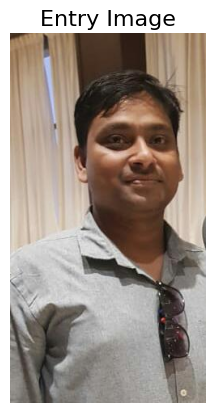

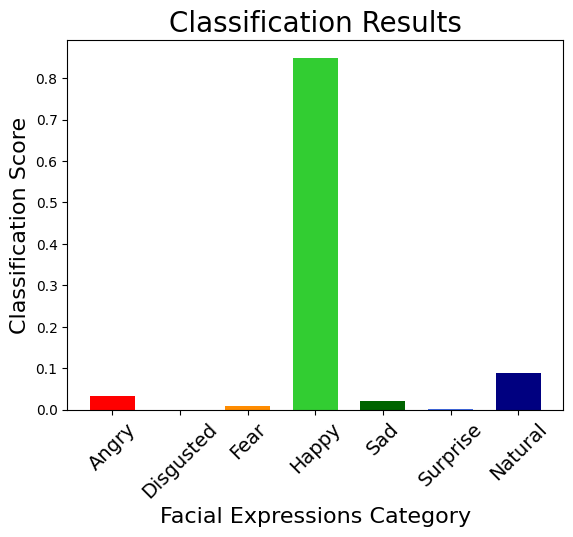

Classification result with the highest rate: Happy


1/1 [==============================] - 0s 39ms/step


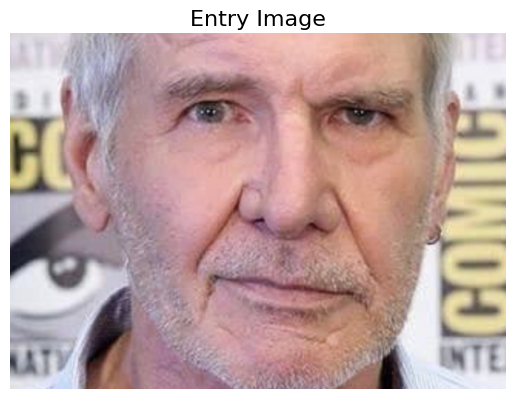

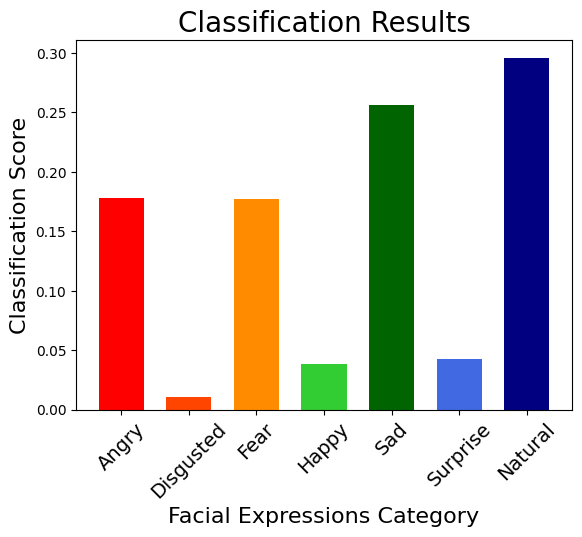

Classification result with the highest rate: Natural


1/1 [==============================] - 0s 33ms/step


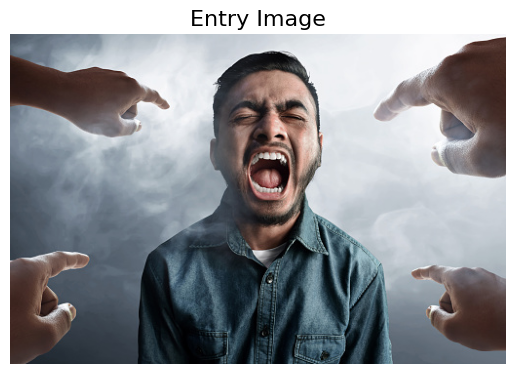

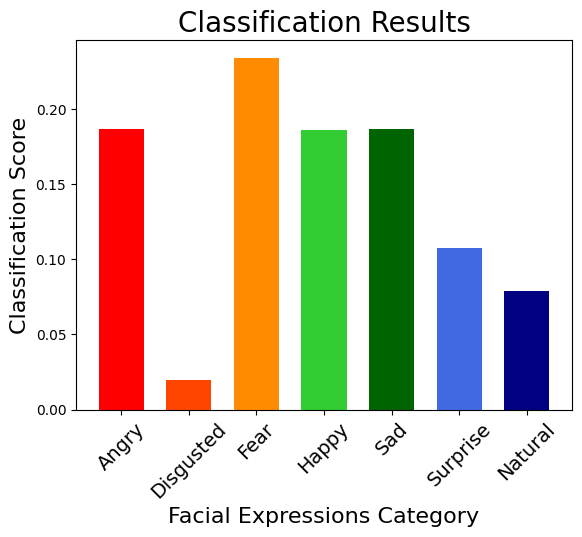

Classification result with the highest rate: Fear


1/1 [==============================] - 0s 34ms/step


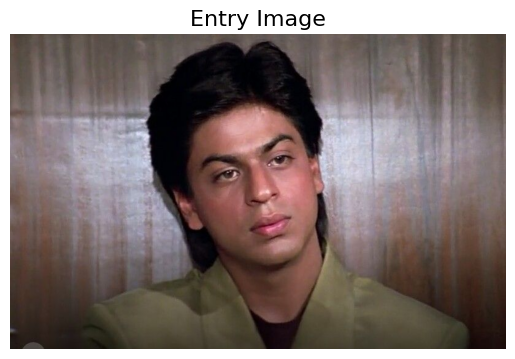

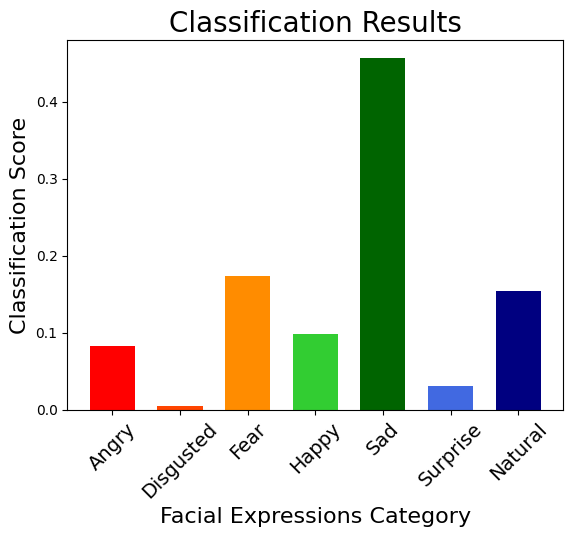

Classification result with the highest rate: Sad




In [51]:
# Classes 7 emotional states
class_names = ['Angry', 'Disgusted', 'Fear', 'Happy', 'Sad', 'Surprise', 'Natural']

ind = 0.1 + 0.6 * np.arange(len(class_names))
width = 0.4

color_list = ['red', 'orangered', 'darkorange', 'limegreen', 'darkgreen', 'royalblue', 'navy']

# List of test image paths
image_paths = ["/content/Test_1.jpg", "/content/Test_2.jpg", "/content/Test_3.jpg", "/content/Test_4.jpg"]

# Load the best model
model_best = load_model('/content/face_model.h5')

# Loop over each test image
for image_path in image_paths:
    # Load and preprocess the test image
    test_image_original = image.load_img(image_path)
    test_image = image.load_img(image_path, target_size=(48, 48), grayscale=True)
    test_data = image.img_to_array(test_image)
    test_data = np.expand_dims(test_data, axis=0)
    test_data = np.vstack([test_data])

    # Predict using the loaded model
    results = model_best.predict(test_data, batch_size=1)

    # Display the original test image
    plt.imshow(test_image_original)
    plt.title('Entry Image', fontsize=16)
    plt.axis('off')
    plt.show()

    # Color the results
    for i in range(len(class_names)):
        plt.bar(ind[i], results[0][i], width, color=color_list[i])

    plt.title("Classification Results", fontsize=20)
    plt.xlabel("Facial Expressions Category", fontsize=16)
    plt.ylabel("Classification Score", fontsize=16)
    plt.xticks(ind, class_names, rotation=45, fontsize=14)
    plt.show()

    print("Classification result with the highest rate:", class_names[np.argmax(results)])
    print("\n" + "="*50 + "\n")  # Separator between results of different images
